In [3]:
!pip install aeon

In [4]:
!pip install tsfel

In [5]:
from aeon.datasets import load_classification, load_forecasting, load_regression
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import tsfel
import pandas as pd

In [6]:
# Assuming total_duration_in_months is the total duration in months and num_samples is the number of samples
total_duration_in_months = 3
num_samples = 4767

total_duration_in_seconds = total_duration_in_months * 30 * 24 * 60 * 60

# Calculate sampling frequency
sampling_frequency = num_samples / total_duration_in_seconds

print("Sampling Frequency:", sampling_frequency, "Hz")

Sampling Frequency: 0.0006130401234567902 Hz


In [7]:
X, y = load_classification("KeplerLightCurves")

In [8]:
print(" Shape of X = ", X.shape)

 Shape of X =  (1319, 1, 4767)


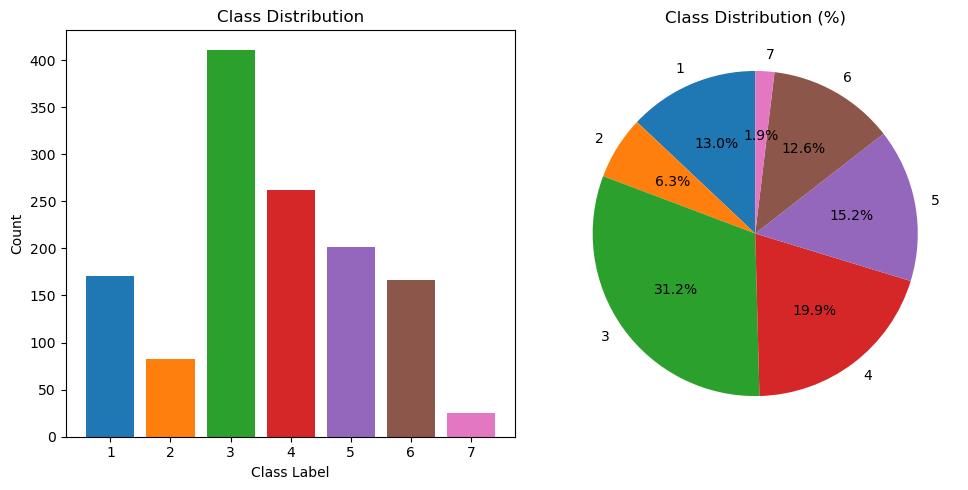

In [9]:
unique_classes, counts = np.unique(y, return_counts=True)

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot on the left
axs[0].bar(unique_classes, counts, color=plt.cm.tab10.colors)
axs[0].set_xlabel('Class Label')
axs[0].set_ylabel('Count')
axs[0].set_title('Class Distribution')

# Pie chart (rounded plot) on the right
axs[1].pie(counts, labels=unique_classes, autopct='%1.1f%%', colors=plt.cm.tab10.colors, startangle=90)
axs[1].set_title('Class Distribution (%)')

plt.tight_layout()
plt.show()

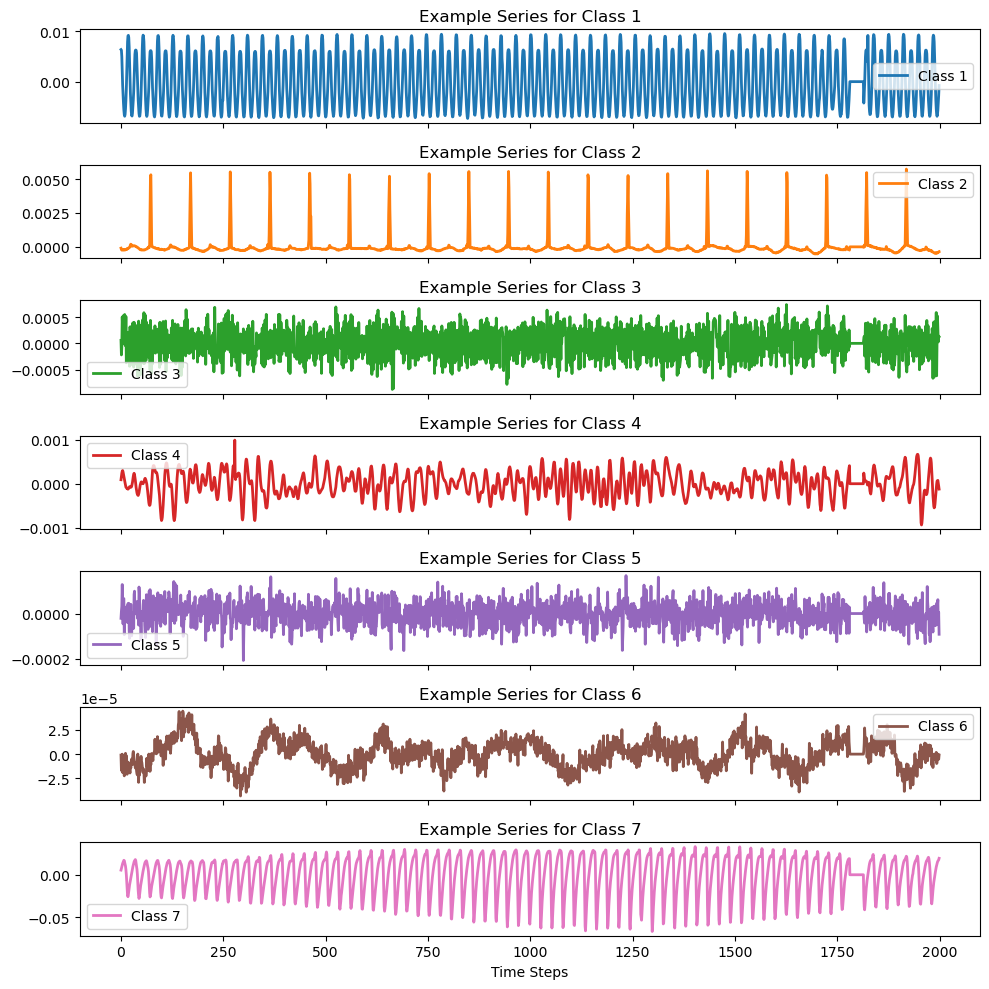

In [10]:
def plot_example_series(X, y, num_samples , num_classes=7):
    unique_classes = np.unique(y)

    fig, axs = plt.subplots(num_classes, 1, figsize=(10, 10), sharex=True)
    colors = cycle(plt.cm.tab10.colors)

    for class_label in unique_classes:
        class_indices = np.where(y == class_label)[0]
        example_series = X[class_indices[9], 0, :num_samples]  # Extract only the first 2000 samples
        axs[int(class_label)-1].plot(example_series, label=f'Class {class_label}', linewidth=2, color=next(colors))
        axs[int(class_label)-1].set_title(f'Example Series for Class {class_label}')
        axs[int(class_label)-1].legend()

    plt.xlabel('Time Steps')
    plt.tight_layout()
    plt.show()

plot_example_series(X,y,2000)

In [11]:
X_reshaped = X.reshape((1319, 4767))

# Initialize an empty array to store the FFT results
X_fft = np.empty((1319, 4767), dtype=complex)

# Compute FFT for each time series
for i in range(1319):
    X_fft[i, :] = np.fft.fft(X_reshaped[i, :])

# Now, X_fft contains the FFT results for each time series
# You can access the FFT of the i-th time series using X_fft[i, :]

# If you want to keep the original shape of X_fft as (1319, 1, 4767)
X_fft = X_fft.reshape((1319, 1, 4767))


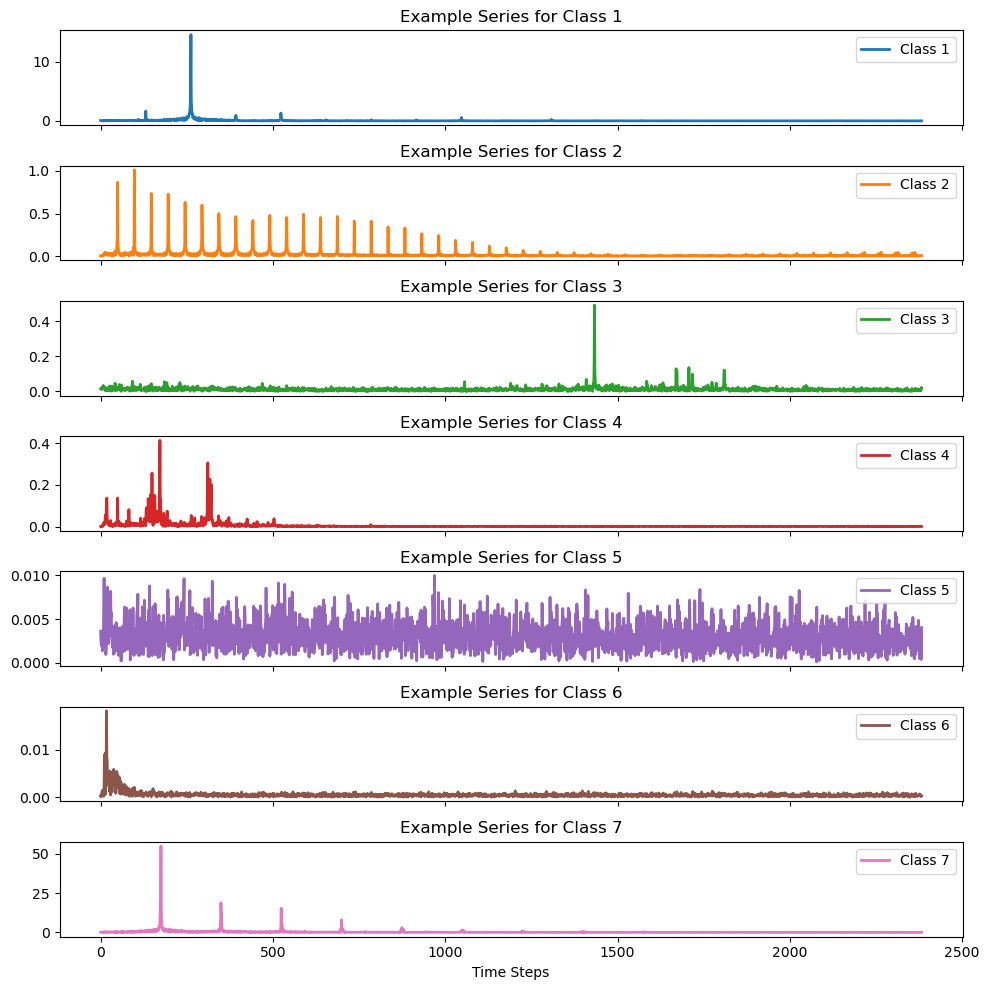

In [12]:
# Define the Nyquist frequency
nyquist_freq = 0.5

# Define the number of points to plot (up to the Nyquist frequency)
num_points = int(X_fft.shape[2] / 2)

plot_example_series(np.abs(X_fft),y,num_points)

## TSFEL Feature extraction

In [13]:
X1 =  [X[i, :, :].reshape(-1, 1) for i in range(X.shape[0])]

In [97]:
cfg_file = tsfel.get_features_by_domain()
X_features = tsfel.time_series_features_extractor(cfg_file, X1,fs=0.000613)

*** Feature extraction started ***



*** Feature extraction finished ***


In [15]:
#X_train['Target'] = y

In [16]:
pd.set_option('display.max_columns', None)
X_features

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,0_ECDF_6,0_ECDF_7,0_ECDF_8,0_ECDF_9,0_Entropy,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_10,0_FFT mean coefficient_100,0_FFT mean coefficient_101,0_FFT mean coefficient_102,0_FFT mean coefficient_103,0_FFT mean coefficient_104,0_FFT mean coefficient_105,0_FFT mean coefficient_106,0_FFT mean coefficient_107,0_FFT mean coefficient_108,0_FFT mean coefficient_109,0_FFT mean coefficient_11,0_FFT mean coefficient_110,0_FFT mean coefficient_111,0_FFT mean coefficient_112,0_FFT mean coefficient_113,0_FFT mean coefficient_114,0_FFT mean coefficient_115,0_FFT mean coefficient_116,0_FFT mean coefficient_117,0_FFT mean coefficient_118,0_FFT mean coefficient_119,0_FFT mean coefficient_12,0_FFT mean coefficient_120,0_FFT mean coefficient_121,0_FFT mean coefficient_122,0_FFT mean coefficient_123,0_FFT mean coefficient_124,0_FFT mean coefficient_125,0_FFT mean coefficient_126,0_FFT mean coefficient_127,0_FFT mean coefficient_128,0_FFT mean coefficient_129,0_FFT mean coefficient_13,0_FFT mean coefficient_130,0_FFT mean coefficient_131,0_FFT mean coefficient_132,0_FFT mean coefficient_133,0_FFT mean coefficient_134,0_FFT mean coefficient_135,0_FFT mean coefficient_136,0_FFT mean coefficient_137,0_FFT mean coefficient_138,0_FFT mean coefficient_139,0_FFT mean coefficient_14,0_FFT mean coefficient_140,0_FFT mean coefficient_141,0_FFT mean coefficient_142,0_FFT mean coefficient_143,0_FFT mean coefficient_144,0_FFT mean coefficient_145,0_FFT mean coefficient_146,0_FFT mean coefficient_147,0_FFT mean coefficient_148,0_FFT mean coefficient_149,0_FFT mean coefficient_15,0_FFT mean coefficient_150,0_FFT mean coefficient_151,0_FFT mean coefficient_152,0_FFT mean coefficient_153,0_FFT mean coefficient_154,0_FFT mean coefficient_155,0_FFT mean coefficient_156,0_FFT mean coefficient_157,0_FFT mean coefficient_158,0_FFT mean coefficient_159,0_FFT mean coefficient_16,0_FFT mean coefficient_160,0_FFT mean coefficient_161,0_FFT mean coefficient_162,0_FFT mean coefficient_163,0_FFT mean coefficient_164,0_FFT mean coefficient_165,0_FFT mean coefficient_166,0_FFT mean coefficient_167,0_FFT mean coefficient_168,0_FFT mean coefficient_169,0_FFT mean coefficient_17,0_FFT mean coefficient_170,0_FFT mean coefficient_171,0_FFT mean coefficient_172,0_FFT mean coefficient_173,0_FFT mean coefficient_174,0_FFT mean coefficient_175,0_FFT mean coefficient_176,0_FFT mean coefficient_177,0_FFT mean coefficient_178,0_FFT mean coefficient_179,0_FFT mean coefficient_18,0_FFT mean coefficient_180,0_FFT mean coefficient_181,0_FFT mean coefficient_182,0_FFT mean coefficient_183,0_FFT mean coefficient_184,0_FFT mean coefficient_185,0_FFT mean coefficient_186,0_FFT mean coefficient_187,0_FFT mean coefficient_188,0_FFT mean coefficient_189,0_FFT mean coefficient_19,0_FFT mean coefficient_190,0_FFT mean coefficient_191,0_FFT mean coefficient_192,0_FFT mean coefficient_193,0_FFT mean coefficient_194,0_FFT mean coefficient_195,0_FFT mean coefficient_196,0_FFT mean coefficient_197,0_FFT mean coefficient_198,0_FFT mean coefficient_199,0_FFT mean coefficient_2,0_FFT mean coefficient_20,0_FFT mean coefficient_200,0_FFT mean coefficient_201,0_FFT mean coefficient_202,0_FFT mean coefficient_203,0_FFT mean coefficient_204,0_FFT mean coefficient_205,0_FFT mean coefficient_206,0_FFT mean coefficient_207,0_FFT mean coefficient_208,0_FFT mean coefficient_209,0_FFT mean coefficient_21,0_FFT mean coefficient_210,0_FFT mean coefficient_211,0_FFT mean coefficient_212,0_FFT mean coefficient_213,0_FFT mean coefficient_214,0_FFT mean coefficient_215,0_FFT mean coefficient_216,0_FFT mean coefficient_217,0_FFT mean coefficient_218,0_FFT mean coefficient_219,0_FFT mean coefficient_22,0_FFT mean coefficient_220,0_FFT mean coefficient_221,0_FFT mean coe

# Feature selection

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [18]:
#X_train = X_train.drop('Target',axis=1)

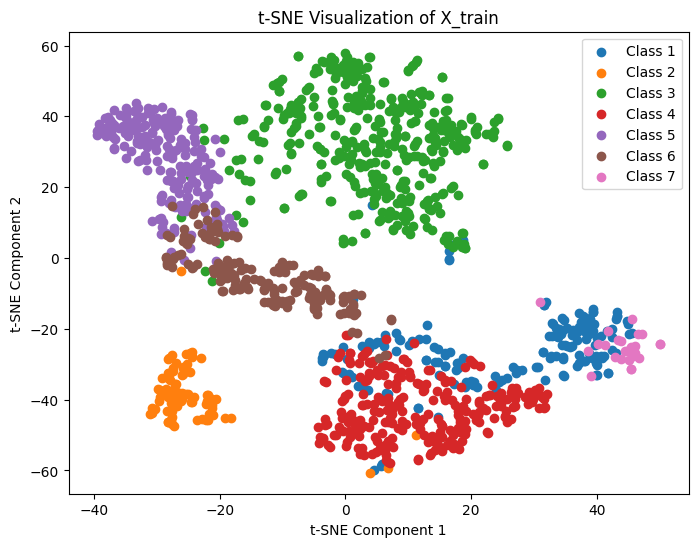

In [27]:
# Assuming X_train is your training data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Initialize t-SNE with 2 components (2D visualization)
tsne = TSNE(n_components=2, perplexity = 20, random_state=42)

# Fit and transform the scaled data
X_tsne = tsne.fit_transform(X_scaled)
y_int= y.astype(int)
# Scatter plot the t-SNE transformed data with color-coded labels
plt.figure(figsize=(8, 6))

# Define colors for each label (assuming 7 unique labels)
colors = np.array(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])

for i in np.unique(y_int):
    plt.scatter(X_tsne[y_int == i, 0], X_tsne[y_int == i, 1], color=colors[i-1], label=f'Class {i}')

plt.title('t-SNE Visualization of X_train')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

### Low variance thres

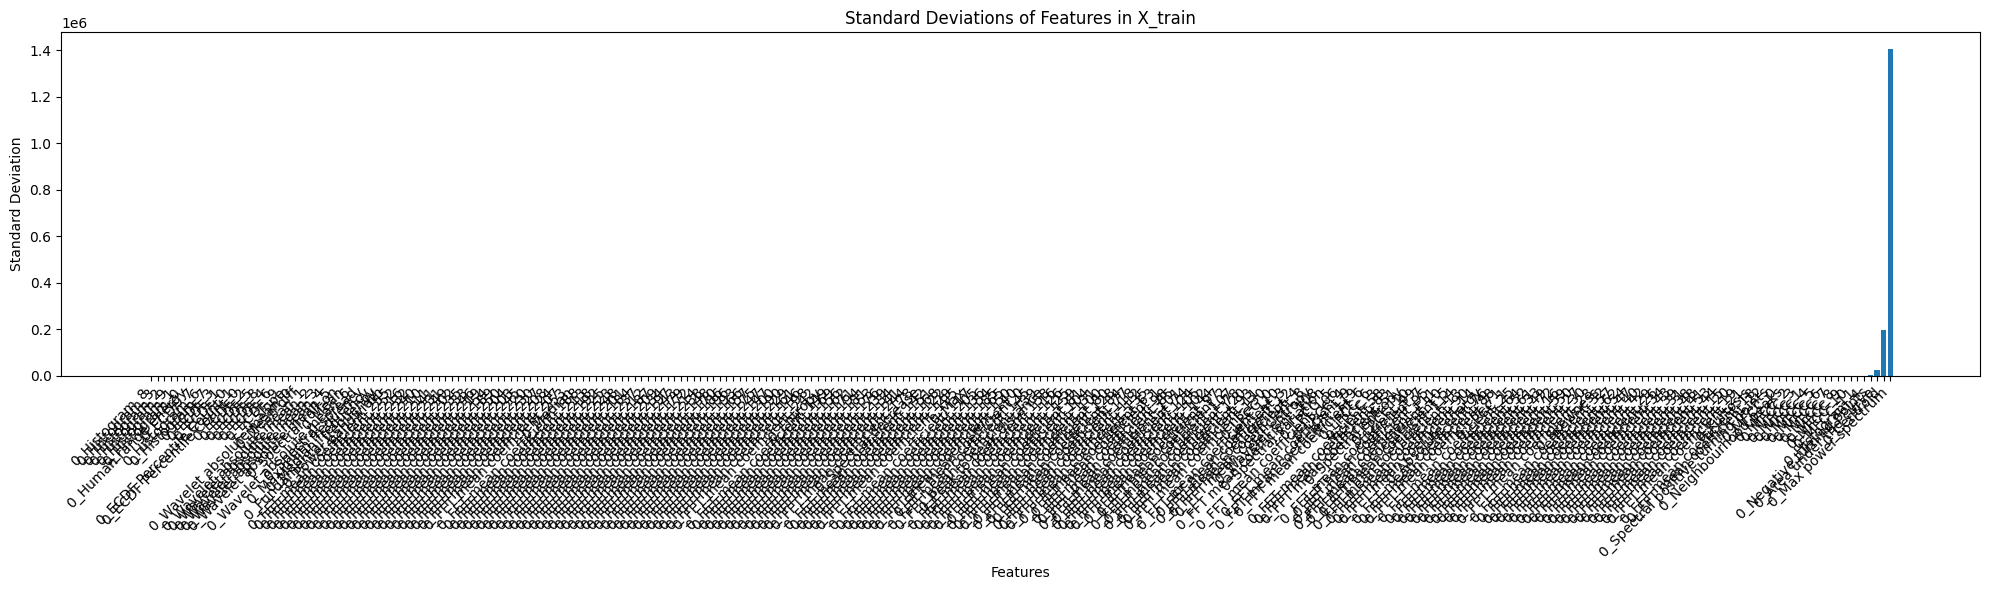

In [62]:
# Assuming X_train is a DataFrame
std_values = X_train.std().sort_values()

# Plotting
plt.figure(figsize=(20, 6))
plt.bar(std_values.index, std_values.values)
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviations of Features in X_train')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [65]:
std_values

0_Histogram_8                0.000000e+00
0_Histogram_3                0.000000e+00
0_Histogram_2                0.000000e+00
0_Histogram_9                0.000000e+00
0_Histogram_1                0.000000e+00
                                 ...     
0_Histogram_4                3.808428e+02
0_Negative turning points    5.564052e+02
0_Area under the curve       2.412499e+04
0_Centroid                   1.953279e+05
0_Max power spectrum         1.407102e+06
Length: 267, dtype: float64

In [63]:
zero_std_features = X_train.columns[X_train.std() ==0]
num_zero_std_features = len(zero_std_features)

print(f"Number of features with standard deviation equal to zero: {num_zero_std_features}")
print("Features with standard deviation equal to zero:")
print(zero_std_features)

Number of features with standard deviation equal to zero: 15
Features with standard deviation equal to zero:
Index(['0_ECDF Percentile Count_0', '0_ECDF Percentile Count_1', '0_ECDF_0',
       '0_ECDF_1', '0_ECDF_3', '0_ECDF_7', '0_Histogram_0', '0_Histogram_1',
       '0_Histogram_2', '0_Histogram_3', '0_Histogram_6', '0_Histogram_7',
       '0_Histogram_8', '0_Histogram_9', '0_Human range energy'],
      dtype='object')


In [64]:
X_train.drop(zero_std_features, axis=1, inplace=True)

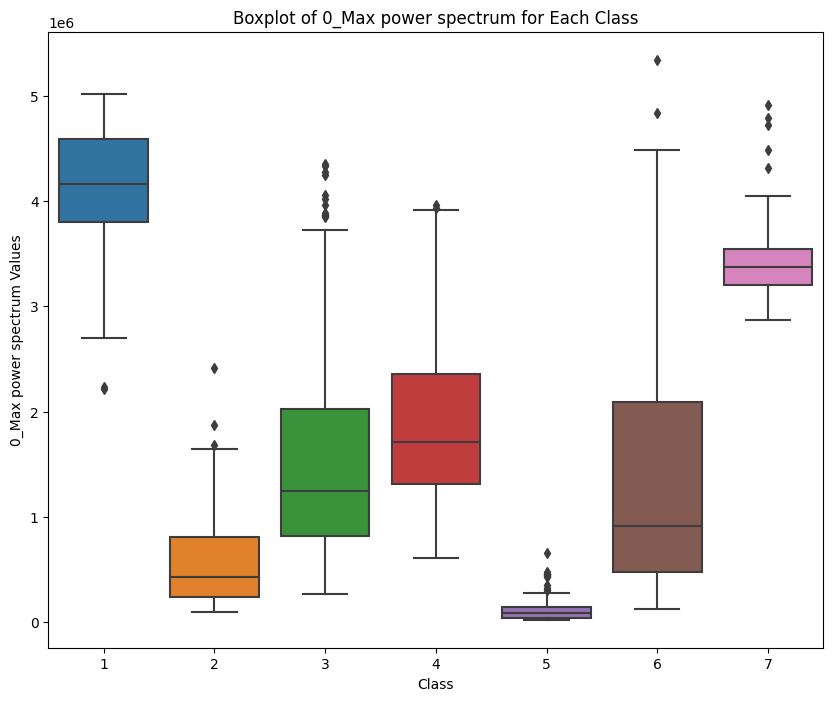

In [67]:
# Assuming X_train is your Pandas DataFrame and 'feature_name' is the feature you want to plot
feature_name = '0_Max power spectrum'  # Replace with the actual feature name

# Create a boxplot using seaborn with 'hue' parameter
plt.figure(figsize=(10, 8))
sns.boxplot(x=y, y=X_train[feature_name])
plt.title(f'Boxplot of {feature_name} for Each Class')
plt.xlabel('Class')
plt.ylabel(f'{feature_name} Values')
plt.show()

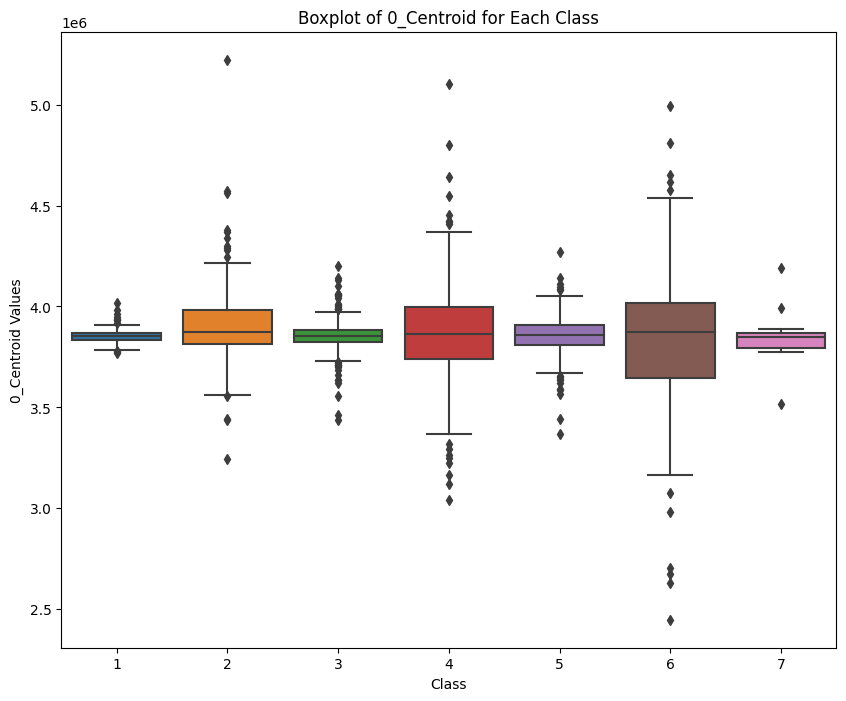

In [68]:
# Assuming X_train is your Pandas DataFrame and 'feature_name' is the feature you want to plot
feature_name = '0_Centroid'  # Replace with the actual feature name

# Create a boxplot using seaborn with 'hue' parameter
plt.figure(figsize=(10, 8))
sns.boxplot(x=y, y=X_train[feature_name])
plt.title(f'Boxplot of {feature_name} for Each Class')
plt.xlabel('Class')
plt.ylabel(f'{feature_name} Values')
plt.show()

### Correlated features

In [19]:
corr_features = tsfel.correlated_features(X_train, threshold = 0.8)
corr_features

['0_Area under the curve',
 '0_Autocorrelation',
 '0_Average power',
 '0_ECDF Percentile_0',
 '0_ECDF Percentile_1',
 '0_FFT mean coefficient_103',
 '0_FFT mean coefficient_109',
 '0_FFT mean coefficient_113',
 '0_FFT mean coefficient_115',
 '0_FFT mean coefficient_116',
 '0_FFT mean coefficient_120',
 '0_FFT mean coefficient_121',
 '0_FFT mean coefficient_123',
 '0_FFT mean coefficient_124',
 '0_FFT mean coefficient_127',
 '0_FFT mean coefficient_128',
 '0_FFT mean coefficient_130',
 '0_FFT mean coefficient_132',
 '0_FFT mean coefficient_133',
 '0_FFT mean coefficient_137',
 '0_FFT mean coefficient_138',
 '0_FFT mean coefficient_139',
 '0_FFT mean coefficient_140',
 '0_FFT mean coefficient_143',
 '0_FFT mean coefficient_144',
 '0_FFT mean coefficient_148',
 '0_FFT mean coefficient_150',
 '0_FFT mean coefficient_152',
 '0_FFT mean coefficient_154',
 '0_FFT mean coefficient_155',
 '0_FFT mean coefficient_158',
 '0_FFT mean coefficient_159',
 '0_FFT mean coefficient_160',
 '0_FFT mean co

In [20]:
X_train_fs = X_train

In [21]:
X_train_fs.drop(corr_features, axis=1, inplace=True)

In [172]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

X_train_fs1 =X_train_fs
# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(X_train_fs)



In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nX_train, y, test_size=0.3, stratify = y ,random_state=42)

In [180]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 20, class_weight = 'balanced')

classes = ['1','2','3','4','5','6','7']

# Train The Classifier
classifier.fit(x_train, y_train.ravel())

RandomForestClassifier(n_estimators=7)

In [181]:
# Predict Test Data
y_predict = classifier.predict(x_test)

# Get the Classification Report
accuracy = accuracy_score(y_test, y_predict)*100
print(classification_report(y_test, y_predict, target_names = classes))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

           1       0.83      0.88      0.86        51
           2       0.95      0.80      0.87        25
           3       0.98      0.99      0.98       123
           4       0.94      0.95      0.94        79
           5       0.96      0.90      0.93        60
           6       0.85      0.90      0.87        50
           7       1.00      0.88      0.93         8

    accuracy                           0.93       396
   macro avg       0.93      0.90      0.91       396
weighted avg       0.93      0.93      0.93       396

Accuracy: 92.92929292929293%


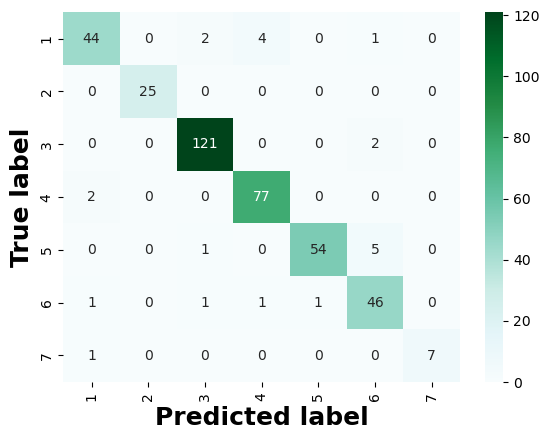

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=[i for i in classes], columns = [i for i in classes])
plt.figure()
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

In [29]:
from sklearn.model_selection import cross_val_score, train_test_split
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation with Random Forest
cv_scores = cross_val_score(rf_classifier, x_train, y_train, cv=5)

# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the Random Forest model on the entire training set
rf_classifier.fit(x_train, y_train)

# Evaluate the model on the test set
X_test_scaled = scaler.transform(x_test)
accuracy = rf_classifier.score(x_test, y_test.astype(int))
print("Test Set Accuracy:", accuracy)

Cross-Validation Scores: [0.92432432 0.92432432 0.96756757 0.93478261 0.92391304]
Mean CV Score: 0.9349823736780258
Test Set Accuracy: 0.0


C:\Users\User\anaconda3new\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3new\Lib\site-packages\sklearn\metrics\_classification.py:226: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


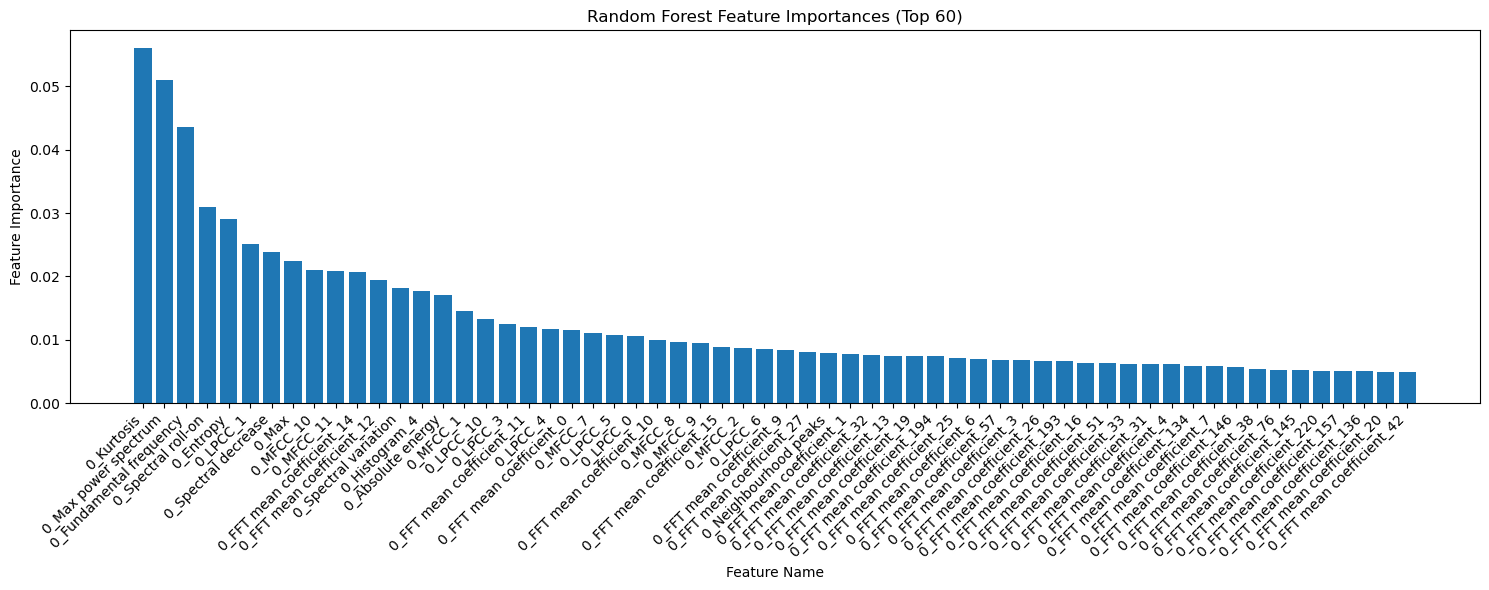

In [32]:

feature_names = X_train_fs.columns.tolist()
feature_importances = rf_classifier.feature_importances_

# Sort indices based on feature importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances with feature names
# Plotting the feature importances for the first 60 features
plt.figure(figsize=(15, 6))
plt.bar(range(60), feature_importances[indices][:60], align="center")
plt.xticks(range(60), [feature_names[i] for i in indices][:60], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances (Top 60)")
plt.tight_layout()
plt.show()

# Information based features

In [34]:
from functions import *

In [42]:
import time

def calculate_entropy_features(x_train,x_train_features):
    """
    Calculate entropy-related features for each component in each time series.

    Parameters:
    - x_train: List of arrays representing time series data.

    Returns:
    - result_df: DataFrame containing calculated features.
    """

    # Initialize an empty list to store the results
    df = []

    # Initialize variables to store overall execution time and feature-wise execution times
    overall_start_time = time.time()
    feature_times = {"PermEnt": [], "SpecEnt": [], "AppEnt": [], "SampleEnt": []}

    # Iterate over each time series
    for i in range(len(x_train)):

        # Get the current time series
        time_series = x_train[i]

        # Initialize a dictionary to store the features for each component
        features_dict = {}

        # Iterate over each component
        for j in range(time_series.shape[1]):
            component_data = time_series[:, j]

            # Measure time for permutation entropy
            start_time = time.time()
            features_dict[f"PermEnt{j+1}"] = permutation_entropy(component_data, order=3)
            feature_times["PermEnt"].append(time.time() - start_time)

            # Measure time for spectral entropy
            start_time = time.time()
            features_dict[f"SpecEnt{j+1}"] = spectral_entropy(component_data, Fs=20)
            feature_times["SpecEnt"].append(time.time() - start_time)

            # Measure time for approximate entropy
            start_time = time.time()
            features_dict[f"AppEnt{j+1}"] = approximate_entropy(component_data, order=2)
            feature_times["AppEnt"].append(time.time() - start_time)

            # Measure time for sample entropy
            start_time = time.time()
            features_dict[f"SampleEnt{j+1}"] = sample_entropy(component_data, order=2)
            feature_times["SampleEnt"].append(time.time() - start_time)

        # Append the features for the current time series to the overall list
        df.append(features_dict)

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(df)
    result_df = pd.concat([x_train_features, df], axis=1)
    
    overall_execution_time = time.time() - overall_start_time

    print(f"Overall execution time: {overall_execution_time} seconds")
    for feature, times in feature_times.items():
        average_time = sum(times) / len(times) if times else 0
        print(f"Average time for {feature}: {average_time} seconds")

    return result_df

In [121]:
new_featurs =calculate_entropy_features(X1,X_features)

Overall execution time: 178.74927759170532 seconds
Average time for PermEnt: 0.0005795910468690769 seconds
Average time for SpecEnt: 0.00048653712500397955 seconds
Average time for AppEnt: 0.08668894926827454 seconds
Average time for SampleEnt: 0.04774670116462158 seconds


In [160]:
new_featurs1 = new_featurs

In [123]:
corr_features = tsfel.correlated_features(new_featurs)
corr_features

['0_Autocorrelation',
 '0_Average power',
 '0_ECDF Percentile_0',
 '0_ECDF Percentile_1',
 '0_FFT mean coefficient_103',
 '0_FFT mean coefficient_109',
 '0_FFT mean coefficient_113',
 '0_FFT mean coefficient_115',
 '0_FFT mean coefficient_121',
 '0_FFT mean coefficient_123',
 '0_FFT mean coefficient_127',
 '0_FFT mean coefficient_132',
 '0_FFT mean coefficient_133',
 '0_FFT mean coefficient_137',
 '0_FFT mean coefficient_138',
 '0_FFT mean coefficient_143',
 '0_FFT mean coefficient_152',
 '0_FFT mean coefficient_155',
 '0_FFT mean coefficient_160',
 '0_FFT mean coefficient_163',
 '0_FFT mean coefficient_164',
 '0_FFT mean coefficient_167',
 '0_FFT mean coefficient_17',
 '0_FFT mean coefficient_173',
 '0_FFT mean coefficient_174',
 '0_FFT mean coefficient_177',
 '0_FFT mean coefficient_180',
 '0_FFT mean coefficient_182',
 '0_FFT mean coefficient_183',
 '0_FFT mean coefficient_191',
 '0_FFT mean coefficient_199',
 '0_FFT mean coefficient_206',
 '0_FFT mean coefficient_215',
 '0_FFT mean

In [134]:
# Assuming df is your DataFrame
correlation_matrix = new_featurs.corr()

selected_feature = 'SampleEnt1'

# Extract the correlations with the selected feature
correlation_with_selected_feature = correlation_matrix[selected_feature]

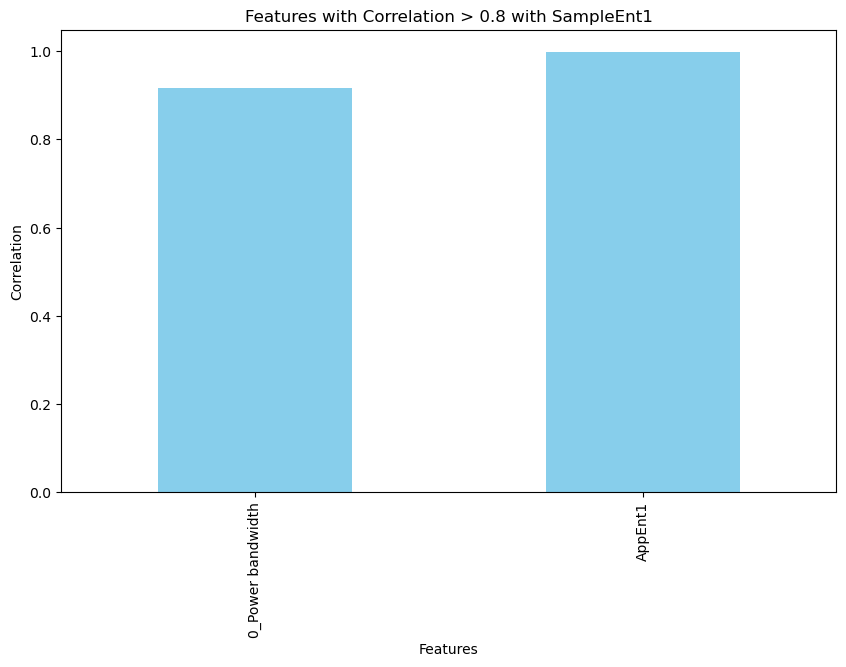

In [135]:
high_correlation_features = correlation_with_selected_feature[correlation_with_selected_feature > 0.9]

# Plot a bar chart for high-correlation features
plt.figure(figsize=(10, 6))
high_correlation_features.drop(selected_feature).plot(kind='bar', color='skyblue')
plt.title(f'Features with Correlation > 0.8 with {selected_feature}')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [162]:
# Highly correlated features are removed
corr_features = tsfel.correlated_features(new_featurs1)
new_featurs1.drop(corr_features, axis=1, inplace=True)

# Remove low variance features
#selector = VarianceThreshold()
#X_train1 = selector.fit_transform(new_featurs1)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train1 = scaler.fit_transform(new_featurs1)

In [163]:
nX_train1.shape

(1319, 268)

In [170]:
x_train, x_test, y_train, y_test = train_test_split(nX_train1, y, test_size=0.3, stratify = y ,random_state=42)


classifier = RandomForestClassifier(n_estimators = 20, class_weight = 'balanced')

classes = ['1','2','3','4','5','6','7']

# Train The Classifier
classifier.fit(x_train, y_train.ravel())
# Predict Test Data
y_predict = classifier.predict(x_test)

# Get the Classification Report
accuracy = accuracy_score(y_test, y_predict)*100
print(classification_report(y_test, y_predict, target_names = classes))
print('Accuracy: ' + str(accuracy) + '%')

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        51
           2       1.00      0.88      0.94        25
           3       0.98      1.00      0.99       123
           4       0.99      1.00      0.99        79
           5       0.98      0.92      0.95        60
           6       0.87      0.96      0.91        50
           7       1.00      0.88      0.93         8

    accuracy                           0.97       396
   macro avg       0.97      0.94      0.95       396
weighted avg       0.97      0.97      0.97       396

Accuracy: 96.71717171717171%


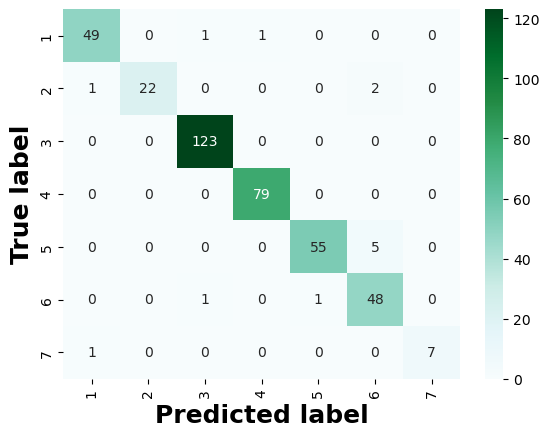

In [171]:
import seaborn as sns
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, index=[i for i in classes], columns = [i for i in classes])
plt.figure()
ax = sns.heatmap(df_cm, cbar = True, cmap="BuGn", annot = True, fmt = 'd')
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.ylabel('True label', fontweight = 'bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight = 'bold', fontsize = 18)
plt.show()

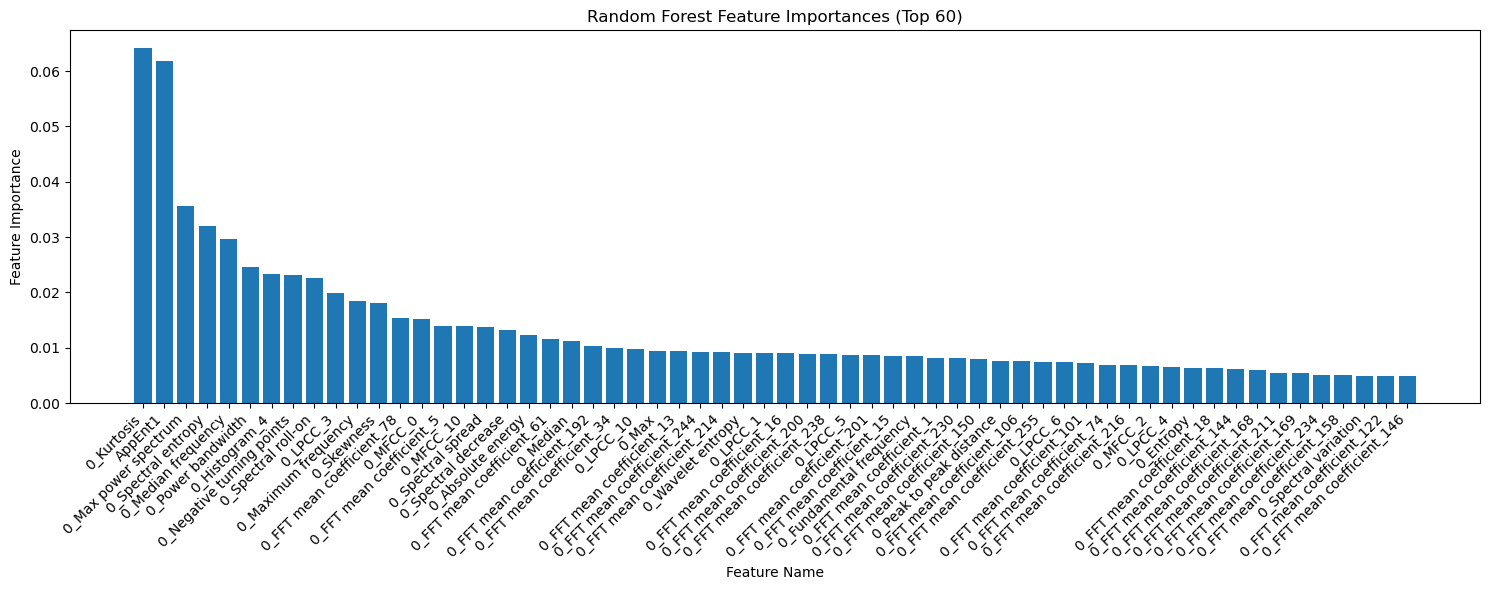

In [166]:

feature_names = new_featurs1.columns.tolist()
feature_importances = classifier.feature_importances_

# Sort indices based on feature importance
indices = np.argsort(feature_importances)[::-1]

# Plotting the feature importances with feature names
# Plotting the feature importances for the first 60 features
plt.figure(figsize=(15, 6))
plt.bar(range(60), feature_importances[indices][:60], align="center")
plt.xticks(range(60), [feature_names[i] for i in indices][:60], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.title("Random Forest Feature Importances (Top 60)")
plt.tight_layout()
plt.show()

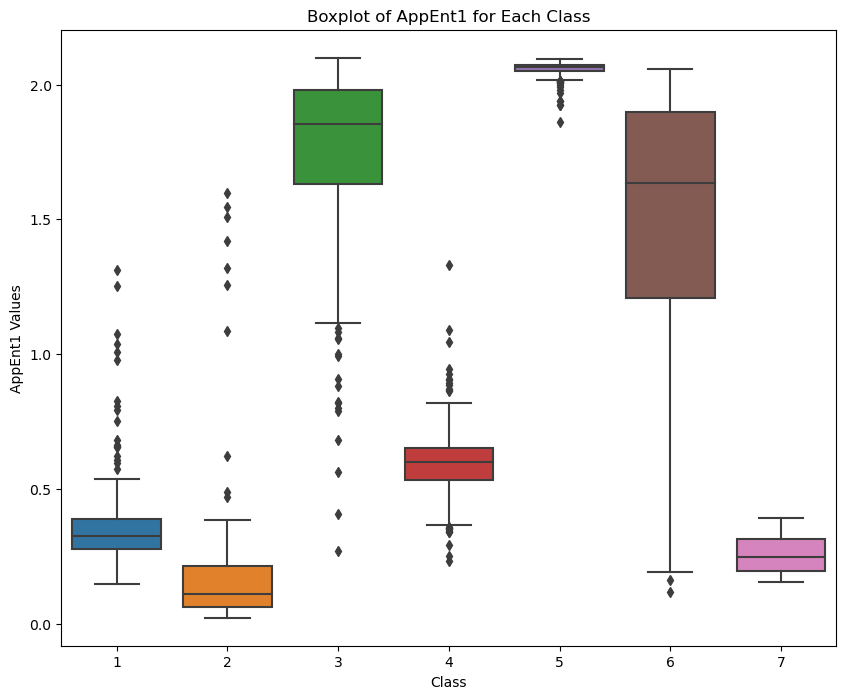

In [138]:
# Assuming X_train is your Pandas DataFrame and 'feature_name' is the feature you want to plot
feature_name = 'AppEnt1'  # Replace with the actual feature name

# Create a boxplot using seaborn with 'hue' parameter
plt.figure(figsize=(10, 8))
sns.boxplot(x=y, y=new_featurs[feature_name])
plt.title(f'Boxplot of {feature_name} for Each Class')
plt.xlabel('Class')
plt.ylabel(f'{feature_name} Values')
plt.show()